# Predict Customer Clicked Ads Classification By Using Machine Learning

### **Import Libraries and Settings**

In [1]:
# Import initial necessary libraries
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Settings of dataframe display
pd.options.display.max_columns = 100
pd.options.display.max_colwidth = None

# Version requirements
print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.26.4
pandas version :  2.2.1
seaborn version :  0.13.2


## Load Dataset

In [2]:
df = pd.read_csv('Clicked Ads Dataset.csv')

In [3]:
df.sample(10)

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category
584,584,56.16,25,465008880.0,164.25,Laki-Laki,1/22/2016 19:43,Yes,Bandung,Jawa Barat,Food
474,474,47.48,31,205514400.0,141.34,Perempuan,6/30/2016 0:19,Yes,Tangerang Selatan,Banten,Otomotif
618,618,35.55,39,361154220.0,151.18,Perempuan,1/13/2016 20:38,Yes,Semarang,Jawa Tengah,Health
459,459,79.82,26,360588620.0,223.28,Laki-Laki,7/17/2016 22:04,No,Medan,Sumatra Utara,Food
329,329,41.47,31,426677510.0,219.79,Perempuan,7/6/2016 15:56,Yes,Jakarta Selatan,Daerah Khusus Ibukota Jakarta,Fashion
569,569,71.28,37,471152010.0,246.72,Laki-Laki,4/10/2016 16:08,No,Denpasar,Bali,Fashion
308,308,84.88,32,447473740.0,186.48,Perempuan,4/18/2016 3:41,No,Bandung,Jawa Barat,Bank
907,907,87.18,31,408015020.0,193.60,Perempuan,1/31/2016 5:12,No,Medan,Sumatra Utara,Otomotif
195,195,71.86,32,361433380.0,116.53,Perempuan,5/17/2016 6:14,Yes,Jakarta Selatan,Daerah Khusus Ibukota Jakarta,Electronic
735,735,83.91,29,372565060.0,222.87,Perempuan,1/4/2016 22:27,No,Depok,Jawa Barat,Electronic


In [4]:
df.shape

(1000, 11)

## Initial Transformation

In [5]:
# Drop index column
df.drop(columns='Unnamed: 0', inplace=True)

# Rename column name for and maintain column name similarity
df.rename(columns={'Male': 'Gender',
                   'Timestamp': 'Visit Time',
                   'city' : 'City',
                   'province' : 'Province',
                   'category' : 'Category'}, inplace=True)

# Re-arrange column (target 'Clicked on Ad' at the end --> personal preference)
df_1 = df.drop(columns='Clicked on Ad')
df_2 = df['Clicked on Ad']
df = pd.concat([df_1, df_2], axis='columns')

# Other way to re-arrange column
# df = df[[col for col in df if col != 'Clicked on Ad'] + ['Clicked on Ad']]

In [6]:
df.sample(10)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Gender,Visit Time,City,Province,Category,Clicked on Ad
153,65.40,33,466893840.0,247.31,Perempuan,2/12/2016 22:51,Padang,Sumatra Barat,Furniture,No
757,48.86,35,437245900.0,128.37,Laki-Laki,1/4/2016 0:44,Bekasi,Jawa Barat,Food,Yes
675,82.58,38,458477460.0,225.23,Laki-Laki,3/11/2016 14:50,Batam,Kepulauan Riau,Travel,No
681,44.15,28,342073690.0,141.96,Laki-Laki,1/22/2016 15:03,Depok,Jawa Barat,Otomotif,Yes
839,57.82,46,342071520.0,107.56,Laki-Laki,4/6/2016 14:16,Bandar Lampung,Lampung,Fashion,Yes
772,88.85,40,408541840.0,213.96,Perempuan,1/17/2016 18:45,Surabaya,Jawa Timur,Fashion,No
703,77.65,28,463390620.0,208.01,Perempuan,2/26/2016 19:35,Jakarta Barat,Daerah Khusus Ibukota Jakarta,Health,No
665,58.05,32,111153700.0,195.54,Laki-Laki,2/12/2016 10:39,Serang,Banten,House,Yes
693,65.15,29,289350880.0,117.30,Perempuan,7/14/2016 22:43,Bandar Lampung,Lampung,Finance,Yes
97,39.94,41,454490330.0,156.30,Perempuan,1/8/2016 22:47,Surabaya,Jawa Timur,Electronic,Yes


In [7]:
desc_col = []

for col in df.columns :
    desc_col.append([col, df[col].dtype, df[col].isna().sum(), round(df[col].isna().sum()/len(df) * 100, 2), df.duplicated().sum(), df[col].nunique(), df[col].unique()[:5]])

desc_df = pd.DataFrame(data=desc_col, columns='Feature, Data Type, Null Values, Null Percentage (%), Duplicated Values, Unique Values, 5 Unique Sample'.split(","))
desc_df

,Feature,Data Type,Null Values,Null Percentage (%),Duplicated Values,Unique Values,5 Unique Sample
0,Daily Time Spent on Site,float64,13,1.3,0,890,"[68.95, 80.23, 69.47, 74.15, 68.37]"
1,Age,int64,0,0.0,0,43,"[35, 31, 26, 29, 23]"
2,Area Income,float64,13,1.3,0,987,"[432837300.0, 479092950.00000006, 418501580.0, 383643260.0, 517229930.00000006]"
3,Daily Internet Usage,float64,11,1.1,0,955,"[256.09, 193.77, 236.5, 245.89, 225.58]"
4,Gender,object,3,0.3,0,2,"[Perempuan, Laki-Laki, nan]"
5,Visit Time,object,0,0.0,0,997,"[3/27/2016 0:53, 4/4/2016 1:39, 3/13/2016 20:35, 1/10/2016 2:31, 6/3/2016 3:36]"
6,City,object,0,0.0,0,30,"[Jakarta Timur, Denpasar, Surabaya, Batam, Medan]"
7,Province,object,0,0.0,0,16,"[Daerah Khusus Ibukota Jakarta, Bali, Jawa Timur, Kepulauan Riau, Sumatra Utara]"
8,Category,object,0,0.0,0,10,"[Furniture, Food, Electronic, House, Finance]"
9,Clicked on Ad,object,0,0.0,0,2,"[No, Yes]"


**Feature Descriptions**

- `Daily Time Spent on Site`: Time spent on the site (Minutes)
- `Age`: Age of the customer
- `Area Income`: The total income of customer in an area
- `Daily Internet Usage`: Time spent on the internet (Minutes)
- `Gender`: Gender of the customer
- `Visit Time`: Time the customer visit on the website
- `City`: City of customer's residence
- `Province`: Province of customer's residence
- `Category`: Product category
- `Clicked on Ad`: Whether the customer clicked the ad or not

In [8]:
# Data type correction for Visit Time
df['Visit Time'] = pd.to_datetime(df['Visit Time'])

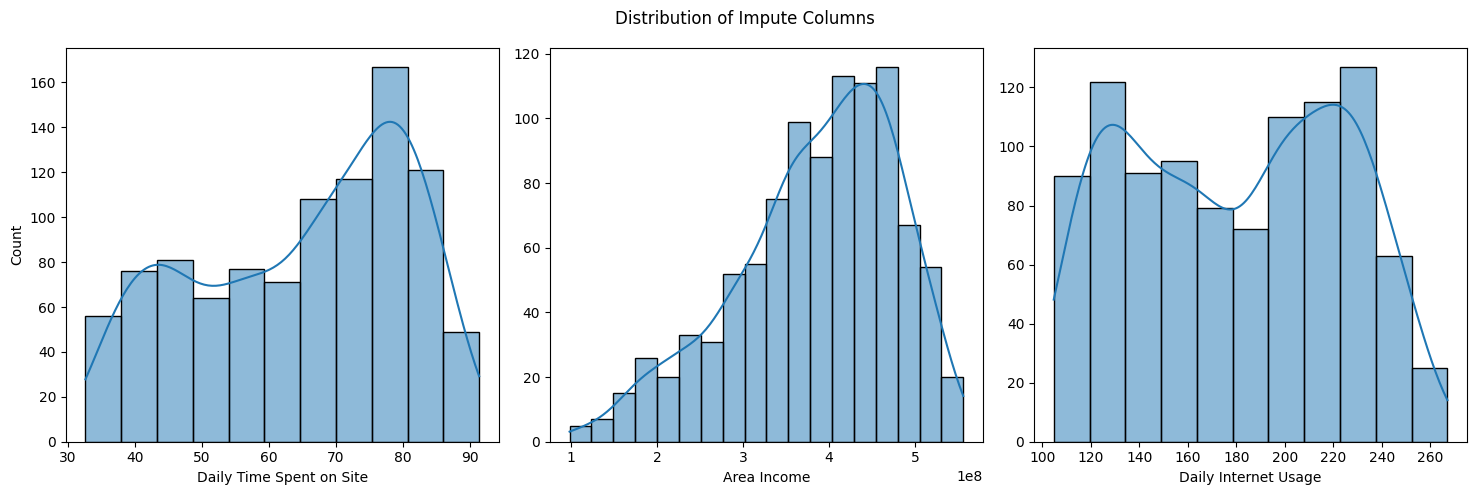

In [9]:
# Checking distribution in columns with missing value for proper imputation method
impute_col = ['Daily Time Spent on Site', 'Area Income', 'Daily Internet Usage']

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Plot histograms for each column
for i, col in enumerate(impute_col):
    sns.histplot(data=df, x=col, kde=True, ax=ax[i])
    if i != 0:
        ax[i].set_ylabel(None)

plt.suptitle('Distribution of Impute Columns')
plt.tight_layout()
plt.show()

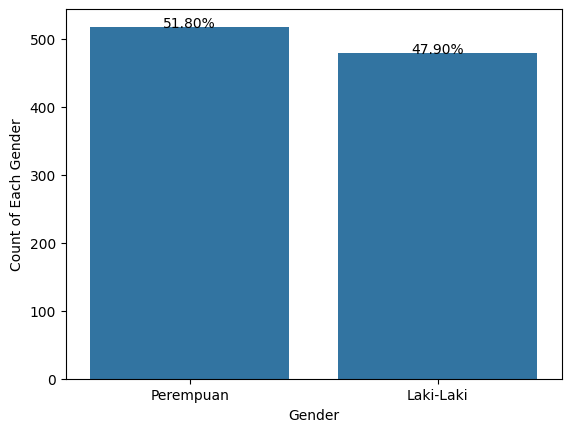

In [10]:
ax = sns.countplot(data=df, x='Gender')

# Calculate the percentage for each category
total = float(len(df))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 0.1,
            '{:.2f}%'.format((height / total
                              ) * 100),
            ha="center")
plt.ylabel('Count of Each Gender')
plt.show()

> Imputation method based on distribution :

- Daily Time Spent on Site and Daily Internet Usage : mean
- Area Income : median
- Gender : mode

In [11]:
# Impute missing values
df['Daily Time Spent on Site'] = df['Daily Time Spent on Site'].fillna(df['Daily Time Spent on Site'].mean())
df['Daily Internet Usage'] = df['Daily Internet Usage'].fillna(df['Daily Internet Usage'].mean())
df['Area Income'] = df['Area Income'].fillna(df['Area Income'].median())
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])

# EDA

In [12]:
desc_col = []

for col in df.columns :
    desc_col.append([col, df[col].dtype, df[col].isna().sum(), round(df[col].isna().sum()/len(df) * 100, 2), df.duplicated().sum(), df[col].nunique(), df[col].unique()[:5]])

desc_df = pd.DataFrame(data=desc_col, columns='Feature, Data Type, Null Values, Null Percentage, Duplicated Values, Unique Values, 5 Unique Sample'.split(","))
desc_df

,Feature,Data Type,Null Values,Null Percentage,Duplicated Values,Unique Values,5 Unique Sample
0,Daily Time Spent on Site,float64,0,0.0,0,891,"[68.95, 80.23, 69.47, 74.15, 68.37]"
1,Age,int64,0,0.0,0,43,"[35, 31, 26, 29, 23]"
2,Area Income,float64,0,0.0,0,987,"[432837300.0, 479092950.00000006, 418501580.0, 383643260.0, 517229930.00000006]"
3,Daily Internet Usage,float64,0,0.0,0,956,"[256.09, 193.77, 236.5, 245.89, 225.58]"
4,Gender,object,0,0.0,0,2,"[Perempuan, Laki-Laki]"
5,Visit Time,datetime64[ns],0,0.0,0,997,"[2016-03-27 00:53:00, 2016-04-04 01:39:00, 2016-03-13 20:35:00, 2016-01-10 02:31:00, 2016-06-03 03:36:00]"
6,City,object,0,0.0,0,30,"[Jakarta Timur, Denpasar, Surabaya, Batam, Medan]"
7,Province,object,0,0.0,0,16,"[Daerah Khusus Ibukota Jakarta, Bali, Jawa Timur, Kepulauan Riau, Sumatra Utara]"
8,Category,object,0,0.0,0,10,"[Furniture, Food, Electronic, House, Finance]"
9,Clicked on Ad,object,0,0.0,0,2,"[No, Yes]"


- Categorical columns (10 columns): 
    - `Gender` : nominal
    - `City` : nominal
    - `Province` : nominal
    - `Category` : nominal
    -  `Clicked on Ad` : nominal (Binary 0 & 1)

- Numerical/Continuous columns (18 columns) :

    - `Daily Time Spent on Site, Age, Area Income, Daily Internet Usage`

- Date column (1 column) :
    -  `Visit Time`

In [13]:
# Grouping columns based on data types
nums_cols = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage']

cats_cols = ['Gender', 'City', 'Province', 'Category', 'Clicked on Ad']

date_cols = ['Visit Time']

## Statistical Summary

In [14]:
# Numerical columns
nums_summary = df[nums_cols].describe().transpose()
nums_summary['range'] = nums_summary['max'] - nums_summary['min']
nums_summary['coefficient of variation'] = nums_summary['std'] / nums_summary['mean']

nums_summary

,count,mean,std,min,25%,50%,75%,max,range,coefficient of variation
Daily Time Spent on Site,1000.0,6.492952e+01,1.574127e+01,32.60,5.154500e+01,6.778000e+01,7.835250e+01,9.143000e+01,5.883000e+01,0.242436
Age,1000.0,3.600900e+01,8.785562e+00,19.00,2.900000e+01,3.500000e+01,4.200000e+01,6.100000e+01,4.200000e+01,0.243982
Area Income,1000.0,3.850493e+08,9.347971e+07,97975500.00,3.298201e+08,3.990683e+08,4.566932e+08,5.563936e+08,4.584181e+08,0.242773
Daily Internet Usage,1000.0,1.798636e+02,4.362795e+01,104.78,1.390175e+02,1.810650e+02,2.182875e+02,2.670100e+02,1.622300e+02,0.242561


In [15]:
# Categorical columns
cats_summary = df[cats_cols].describe().transpose()

cats_summary['bottom'] = [df[col].value_counts().idxmin() for col in cats_cols]
cats_summary['freq_bottom'] = [df[col].value_counts().min() for col in cats_cols]

cats_summary

,count,unique,top,freq,bottom,freq_bottom
Gender,1000,2,Perempuan,521,Laki-Laki,479
City,1000,30,Surabaya,64,Serang,11
Province,1000,16,Daerah Khusus Ibukota Jakarta,253,Kalimantan Barat,12
Category,1000,10,Otomotif,112,Bank,90
Clicked on Ad,1000,2,No,500,No,500


In [16]:
# Date columns
df[date_cols].describe().transpose()

,count,mean,min,25%,50%,75%,max
Visit Time,1000,2016-04-10 10:33:36.840000,2016-01-01 02:52:00,2016-02-18 02:55:15,2016-04-07 17:27:00,2016-05-31 03:18:00,2016-07-24 00:22:00


## Univariate Analysis

### Numerical

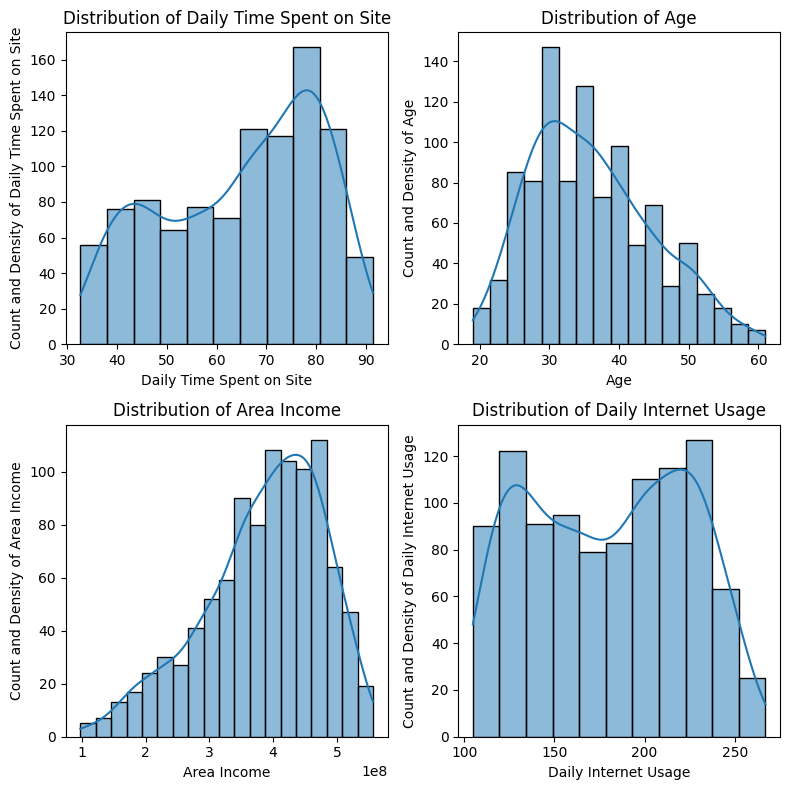

In [17]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))
ax = ax.flatten()

for i, col in enumerate(nums_cols) :
    sns.histplot(data=df, x=col, ax=ax[i], kde=True)
    ax[i].set_title(f'Distribution of {col}')
    ax[i].set_ylabel(f'Count and Density of {col}')
    ax[i].set_xlabel(f'{col}')

plt.tight_layout()
plt.show()

In [18]:
# Distribution categorization
from scipy.stats import skew
from scipy.stats import kurtosis

skew_type_list = []
skew_val_list = []
kurtosis_val_list = []

for column in nums_cols :
    data = df[column]
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)

    mean = round(data.mean(), 3)
    median = data.median()
    mode = data.mode()[0]

    skew_val = round(skew(data, nan_policy="omit"),3)
    kurtosis_val = round(kurtosis(data, nan_policy="omit"),3)

    # Distribution conditions for normal and skewed
    if (mean == median == mode) or (-0.2 < skew_val < 0.2):
        skew_type = "Normal Distribution (Symmetric)"
    elif mean < median < mode:
        skew_type = "Negatively Skewed"
        if skew_val <= -1:
            skew_type = "Highly Negatively Skewed"
        elif -0.5 >= skew_val > -1:
            skew_type = "Moderately Negatively Skewed"
        else :
            skew_type = "Moderately Normal Distribution (Symmetric)"
    else:
        skew_type = "Positively Skewed"
        if skew_val >= 1:
            skew_type = "Highly Positively Skewed"
        elif 0.5 <= skew_val < 1:
            skew_type = "Moderately Positively Skewed"
        else :
            skew_type = "Moderately Normal Distribution (Symmetric)"

    skew_type_list.append(skew_type)
    skew_val_list.append(skew_val)
    kurtosis_val_list.append(kurtosis_val)
            
dist = pd.DataFrame({
    "Column Name":nums_cols,
    "Skewness": skew_val_list,
    "Kurtosis": kurtosis_val_list,
    "Type of Distribution": skew_type_list
})

# Distribution conditions for uniform and bimodal
dist.loc[dist['Column Name'].isin(['Daily Internet Usage', 'Daily Time Spent on Site']), 'Type of Distribution'] = 'Uniform Distribution'
dist.loc[dist['Column Name'].isin(['Column Name']), 'Type of Distribution'] = 'Bimodal Distribution'

dist

,Column Name,Skewness,Kurtosis,Type of Distribution
0,Daily Time Spent on Site,-0.372,-1.074,Uniform Distribution
1,Age,0.478,-0.405,Moderately Normal Distribution (Symmetric)
2,Area Income,-0.653,-0.079,Moderately Normal Distribution (Symmetric)
3,Daily Internet Usage,-0.032,-1.258,Uniform Distribution


Distribution types of each numerical column can be seen in above dataframe, that is almost all of them are categorized as normal distribution. 

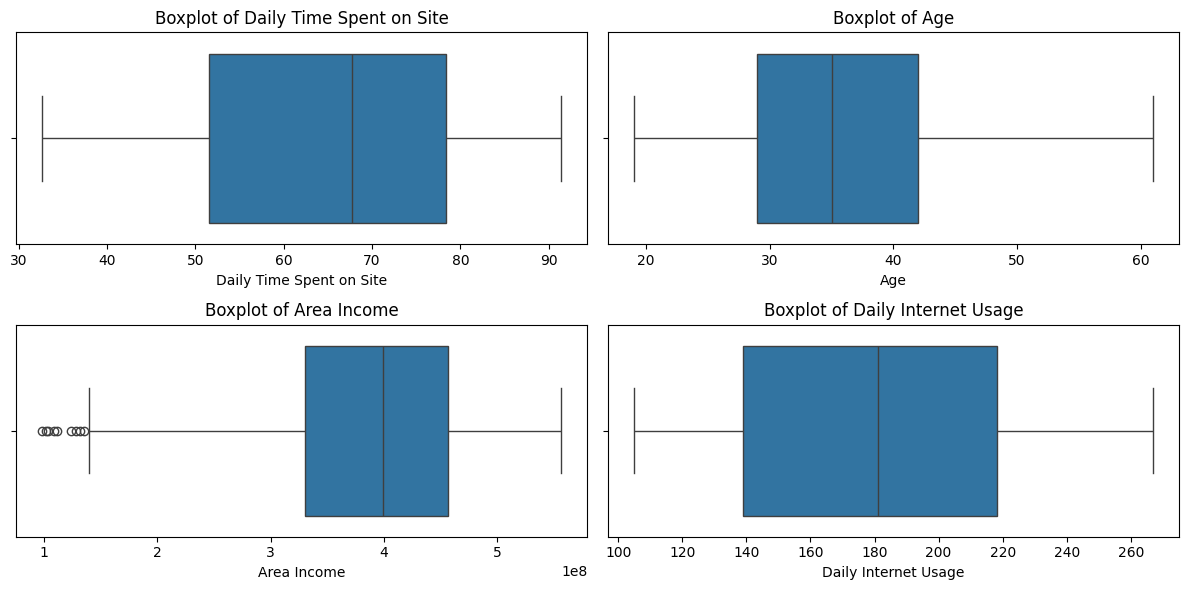

In [19]:
# Boxplot
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 6))
ax = ax.flatten()

for i, col in enumerate(nums_cols) :
    sns.boxplot(data=df, ax=ax[i], x=col)
    ax[i].set_title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

In [20]:
# Outlier detection for original data

print(f'')
print(f'Amount of Rows: {len(df)}')

outlier = []
no_outlier = []
is_outlier = []
low_bound = []
high_bound = []

filtered_entries = np.array([True] * len(df))

for col in nums_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (IQR * 1.5)
    upper_bound = Q3 + (IQR * 1.5)

    filter_outlier = ((df[col] >= lower_bound) & (df[col] <= upper_bound))

    outlier.append(len(df[~filter_outlier]))
    no_outlier.append(len(df[filter_outlier]))
    is_outlier.append(df[col][~filter_outlier].any())
    low_bound.append(lower_bound)
    high_bound.append(upper_bound)

    filtered_entries = ((df[col] >= lower_bound) & (df[col] <= upper_bound)) & filtered_entries

print(f'Amount of Outlier Rows : {len(df[~filtered_entries])}')
print(f'Amount of Non-Outlier Rows : {len(df[filtered_entries])}')
print(f'Percentage of Outliers : {round(len(df[~filtered_entries]) / len(df) * 100, 2)}')
print()

percentage_outlier = np.array(outlier) / len(df) * 100
check_outliers = pd.DataFrame({
    'Column Name':nums_cols,
    'Outlier Exist': is_outlier,
    'Lower Limit': low_bound,
    'Upper Limit': high_bound,
    'Outlier Data': outlier,
    'Non-Outlier Data': no_outlier,
    'Percentage of Outlier': percentage_outlier
})

check_outliers


Amount of Rows: 1000
Amount of Outlier Rows : 9
Amount of Non-Outlier Rows : 991
Percentage of Outliers : 0.9



,Column Name,Outlier Exist,Lower Limit,Upper Limit,Outlier Data,Non-Outlier Data,Percentage of Outlier
0,Daily Time Spent on Site,False,1.133375e+01,1.185637e+02,0,1000,0.0
1,Age,False,9.500000e+00,6.150000e+01,0,1000,0.0
2,Area Income,True,1.395105e+08,6.470028e+08,9,991,0.9
3,Daily Internet Usage,False,2.011250e+01,3.371925e+02,0,1000,0.0


### Categorical

In [21]:
cats_cols

['Gender', 'City', 'Province', 'Category', 'Clicked on Ad']

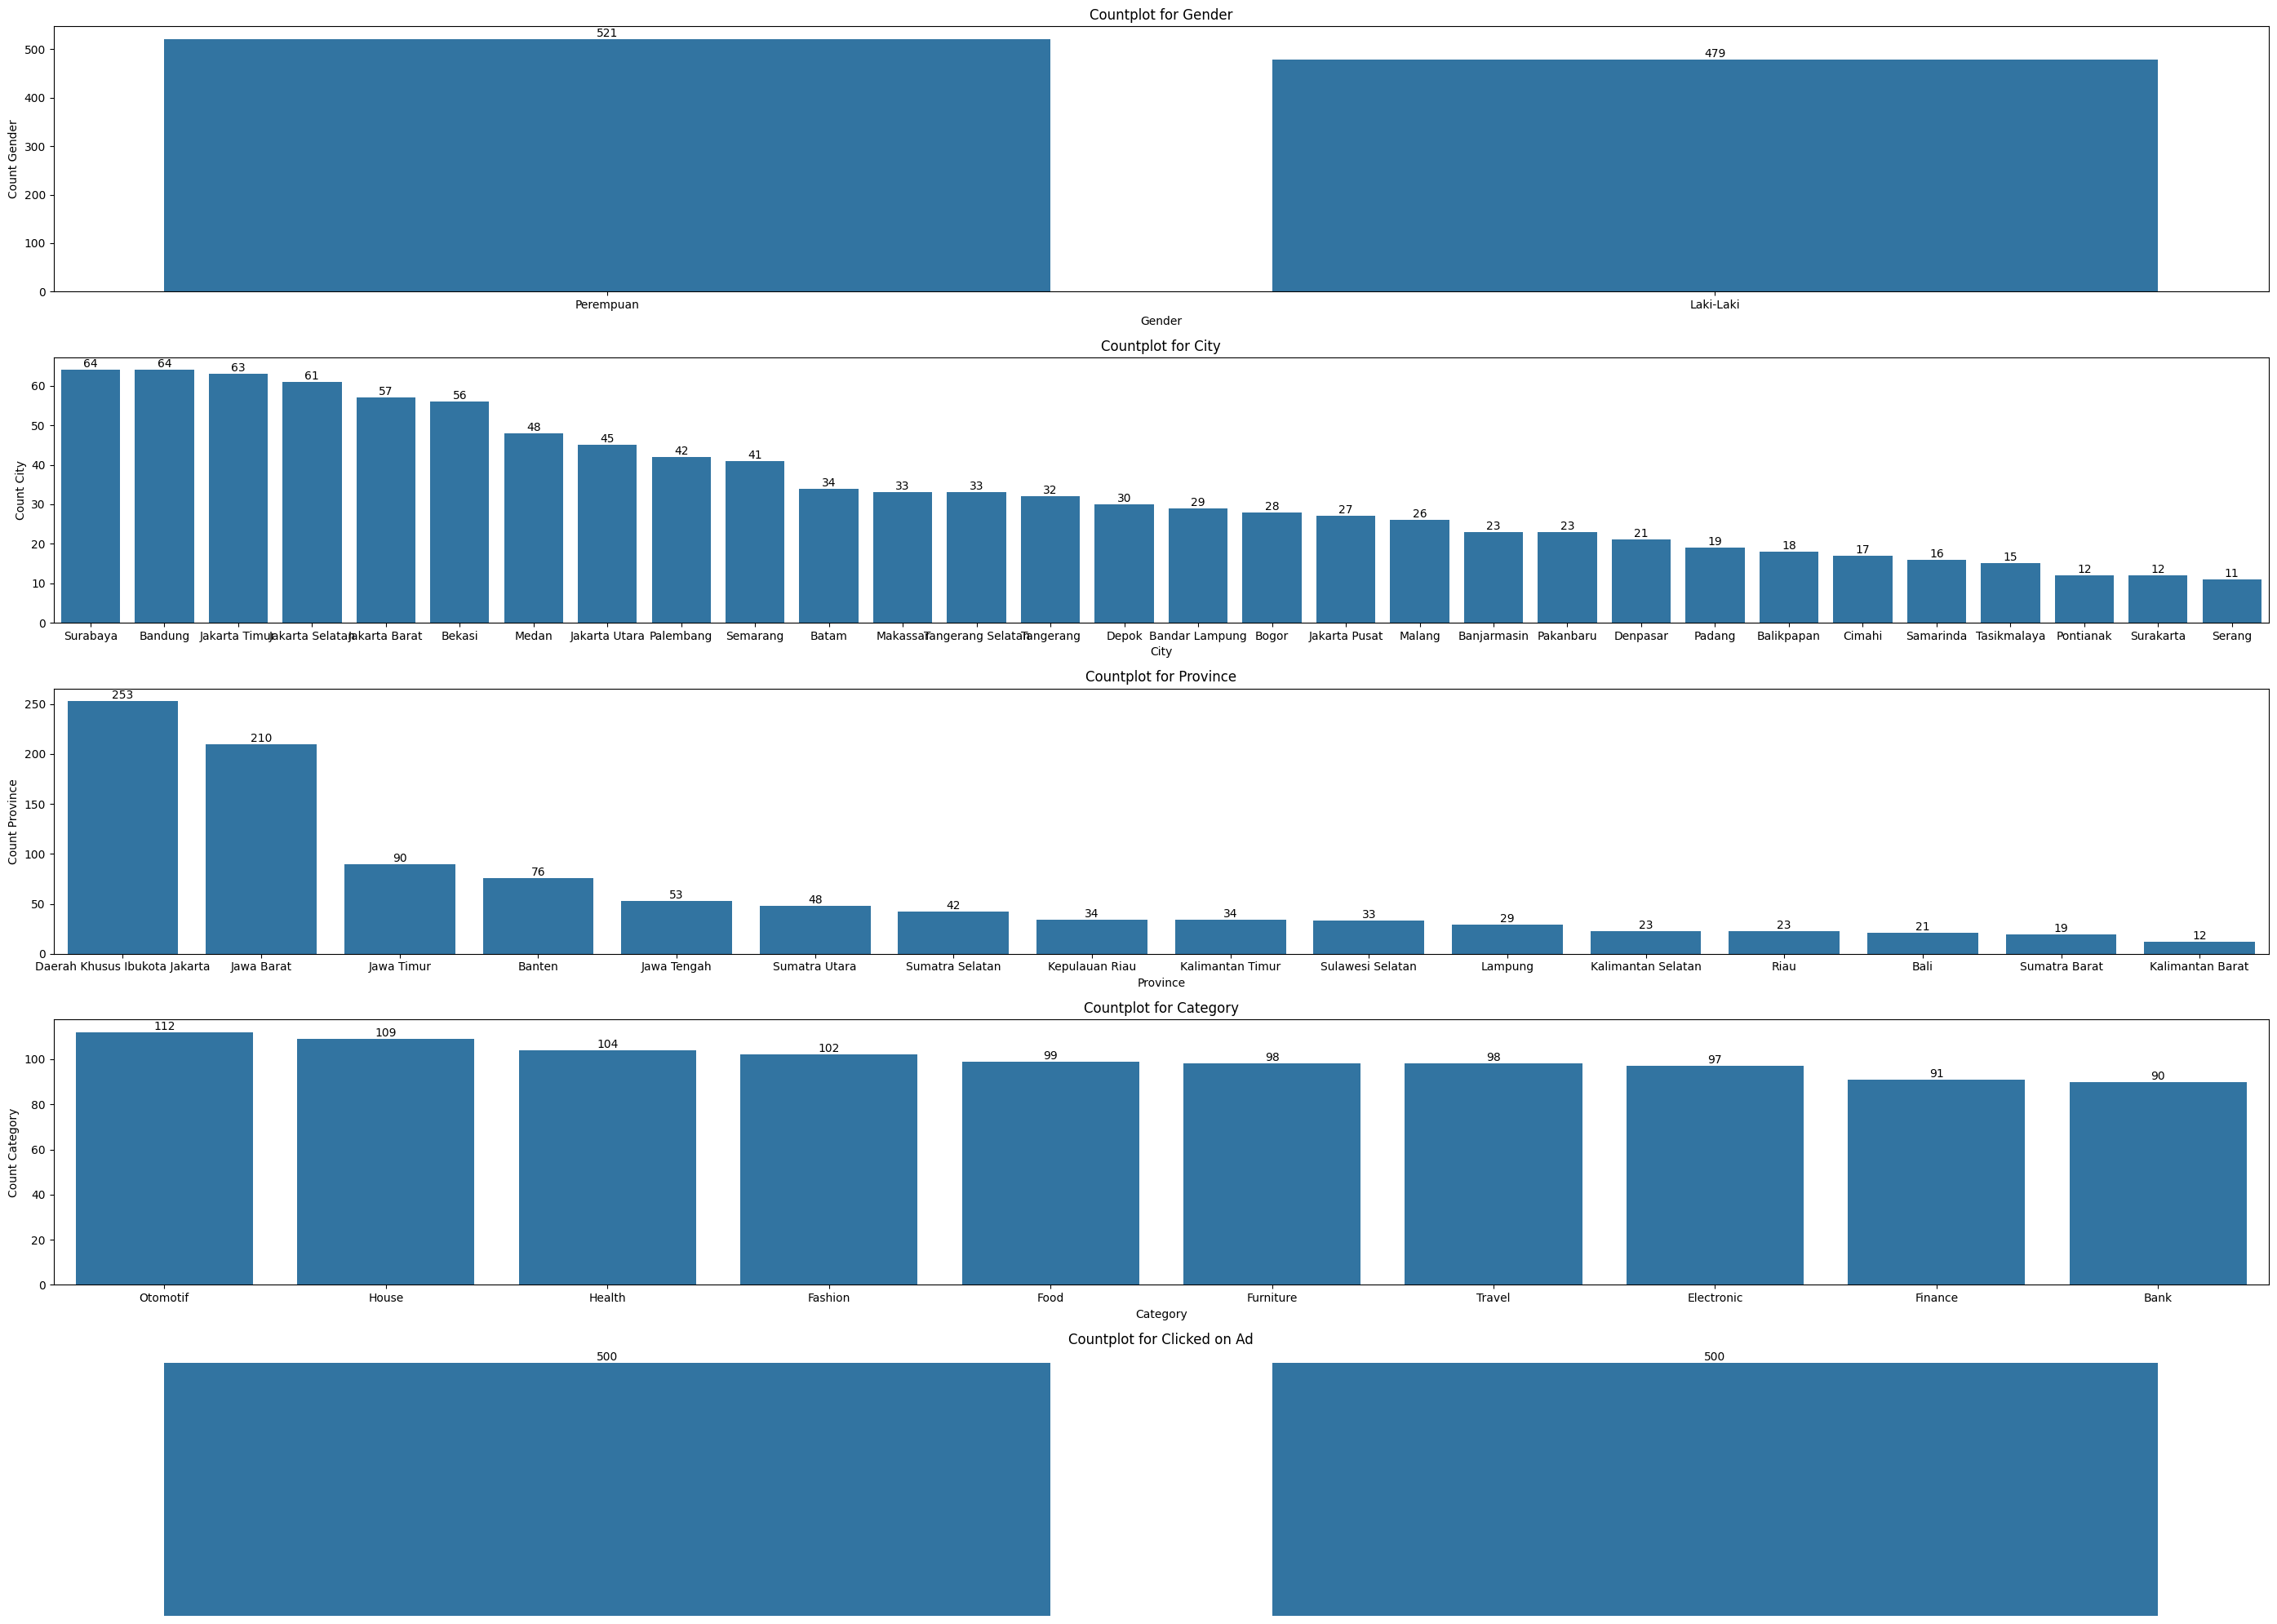

In [22]:
# Categorical Countplot
fig, ax = plt.subplots(nrows=5, ncols=1, figsize=(28, 20))
ax = ax.flatten()

for i, col in enumerate(cats_cols):
    sns.countplot(data=df, x=col, ax=ax[i], order=df[col].value_counts().index)
    ax[i].set_title(f'Countplot for {col}')
    ax[i].set_ylabel(f'Count {col}')
    ax[i].tick_params(axis='x')
    ax[i].bar_label(ax[i].containers[0])

ax[-1].axis('off')
plt.tight_layout()
plt.show()

## Bivariate Analysis

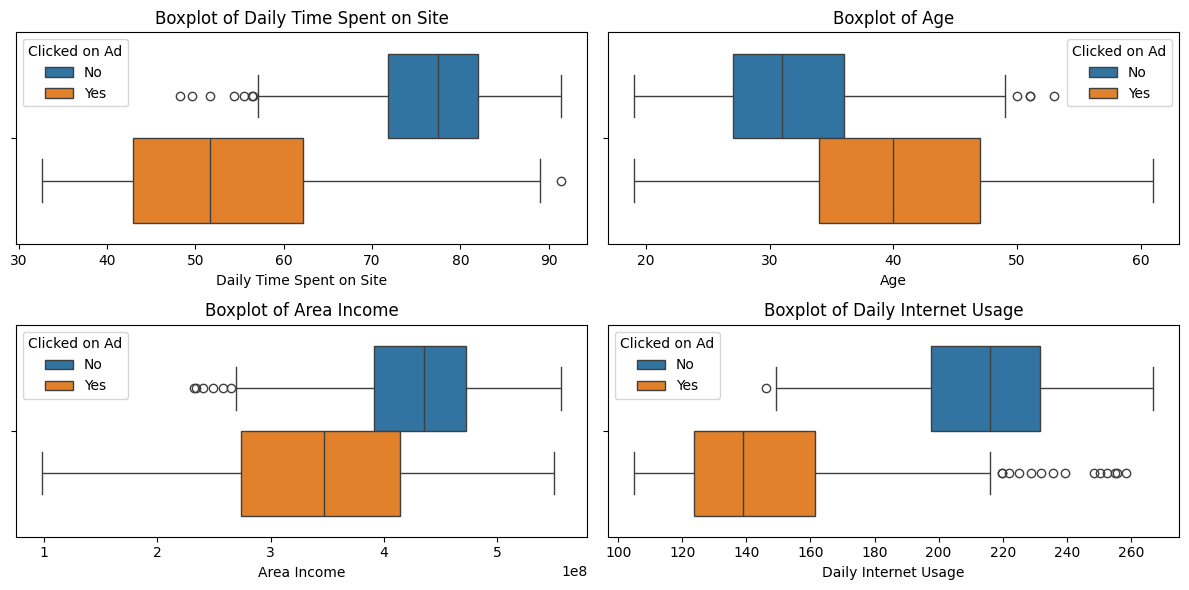

In [59]:
# Boxplot with hue target
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 6))
ax = ax.flatten()

for i, col in enumerate(nums_cols) :
    sns.boxplot(data=df, ax=ax[i], x=col, hue='Clicked on Ad')
    ax[i].set_title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

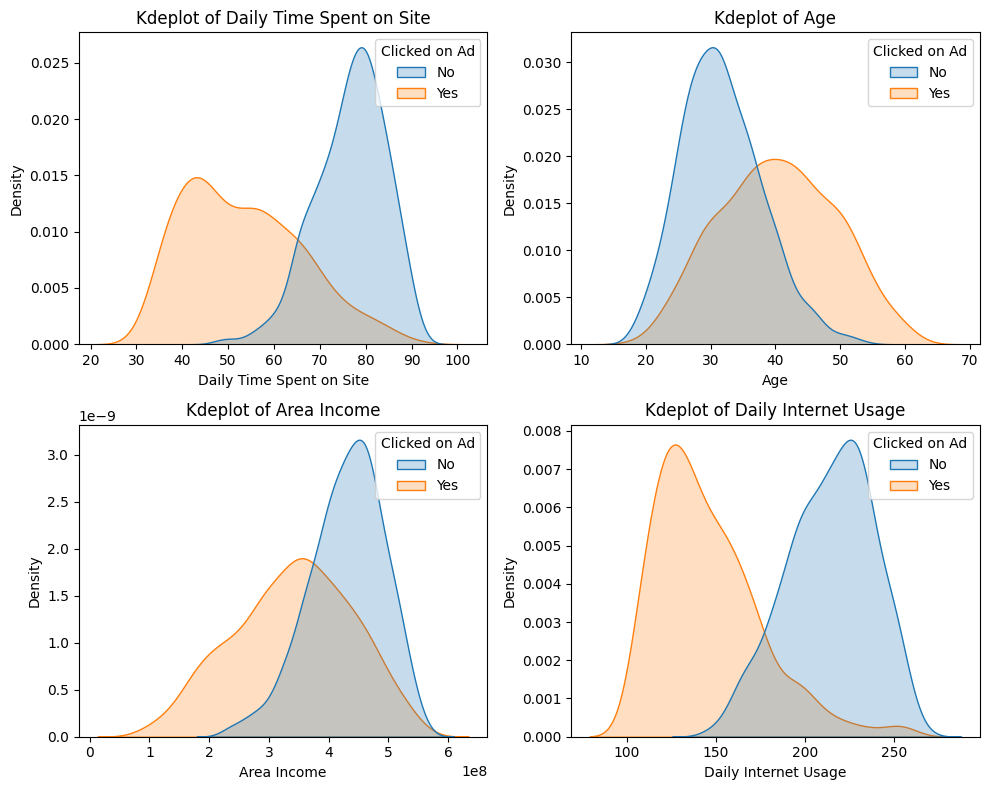

In [56]:
# Kdeplot with hue target
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
ax = ax.flatten()

for i, col in enumerate(nums_cols) :
    sns.kdeplot(data=df, ax=ax[i], x=col, hue='Clicked on Ad', fill=True)
    ax[i].set_title(f'Kdeplot of {col}')

plt.tight_layout()
plt.show()

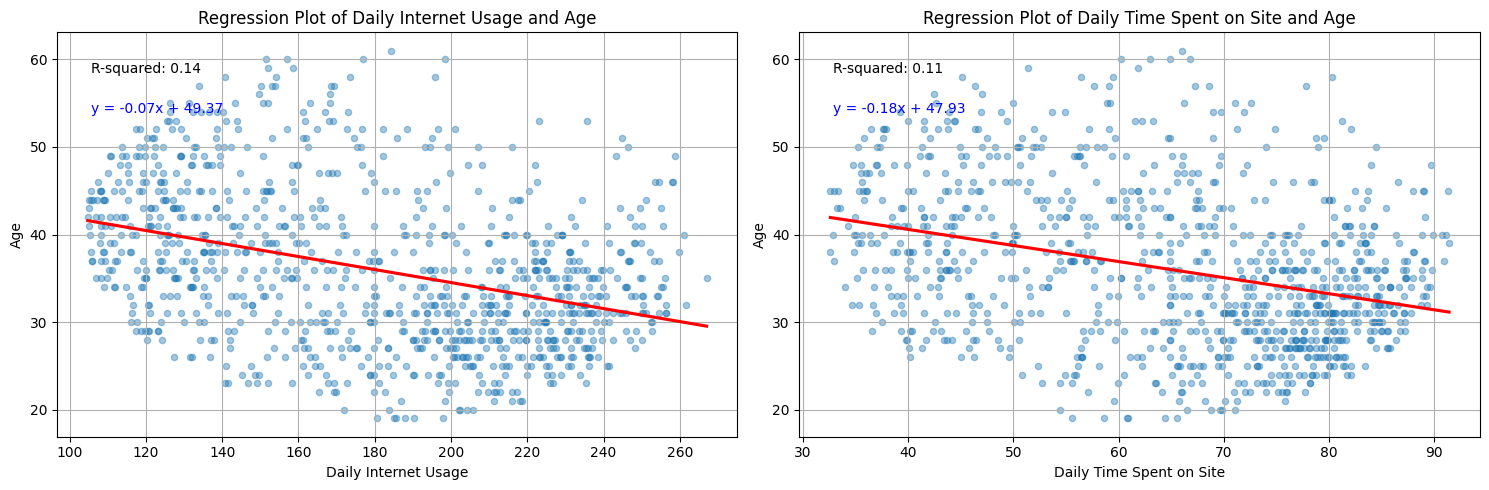

In [49]:
# Regplot of CVR vs Age, Daily Internet Usage, and Daily Time Spent on Site

# Function to calculate R-squared
def calculate_r_squared(x, y, y_pred):
    ss_residual = np.sum((y - y_pred) ** 2)
    ss_total = np.sum((y - np.mean(y)) ** 2)
    r_squared = 1 - (ss_residual / ss_total)
    return r_squared

included_col = ['Daily Internet Usage', 'Daily Time Spent on Site']

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
ax = ax.flatten()

for i, col in enumerate(included_col):
    # Regression plot
    sns.regplot(data=df, ax=ax[i], x=col, y='Age', scatter_kws={'s':20, 'alpha':0.4}, line_kws={'color':'red'}, ci=False)
    ax[i].set_title(f'Regression Plot of {col} and Age')

    # Calculating and displaying R-squared
    x = df[col]
    y = df['Age']
    slope, intercept = np.polyfit(x, y, 1)
    y_pred = slope * x + intercept
    r_squared = calculate_r_squared(x, y, y_pred)
    ax[i].text(0.05, 0.9, f'R-squared: {r_squared:.2f}', transform=ax[i].transAxes)

    # Displaying regression equation
    ax[i].annotate(f'y = {slope:.2f}x + {intercept:.2f}', xy=(0.05, 0.8), xycoords='axes fraction', fontsize=10, color='blue')

    ax[i].grid(True)
    
plt.tight_layout()
plt.show()

- A low R-squared value (close to 0) suggests that the independent variable(s) does not explain much of the variability in the dependent variable, indicating a weak relationship.
- An R-squared value around 0.11 could be considered a weak to modest relationship.

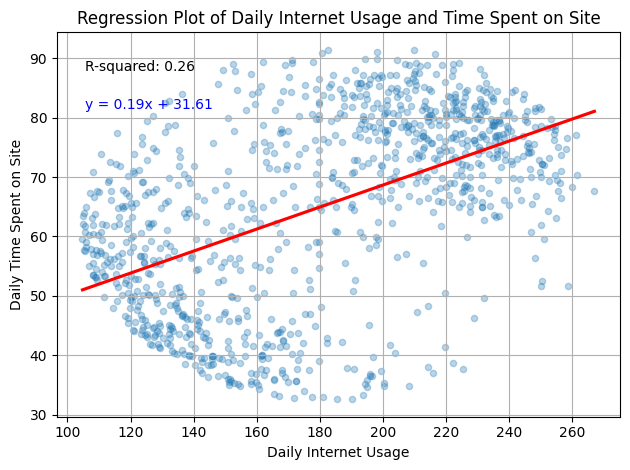

In [77]:
# Regplot of Daily Internet Usage  Daily and Time Spent on Site

# Function to calculate R-squared
def calculate_r_squared(x, y, y_pred):
    ss_residual = np.sum((y - y_pred) ** 2)
    ss_total = np.sum((y - np.mean(y)) ** 2)
    r_squared = 1 - (ss_residual / ss_total)
    return r_squared

regplot = sns.regplot(data=df, x='Daily Internet Usage', y='Daily Time Spent on Site', scatter_kws={'s':20, 'alpha':0.3}, line_kws={'color':'red'}, ci=False)

# Calculating and displaying R-squared
x = df['Daily Internet Usage']
y = df['Daily Time Spent on Site']
slope, intercept = np.polyfit(x, y, 1)
y_pred = slope * x + intercept
r_squared = calculate_r_squared(x, y, y_pred)

plt.text(0.05, 0.9, f'R-squared: {r_squared:.2f}', transform=regplot.transAxes)
plt.annotate(f'y = {slope:.2f}x + {intercept:.2f}', xy=(0.05, 0.8), xycoords='axes fraction', fontsize=10, color='blue')
plt.title(f'Regression Plot of Daily Internet Usage and Time Spent on Site')
plt.grid(True)
    
plt.tight_layout()
plt.show()

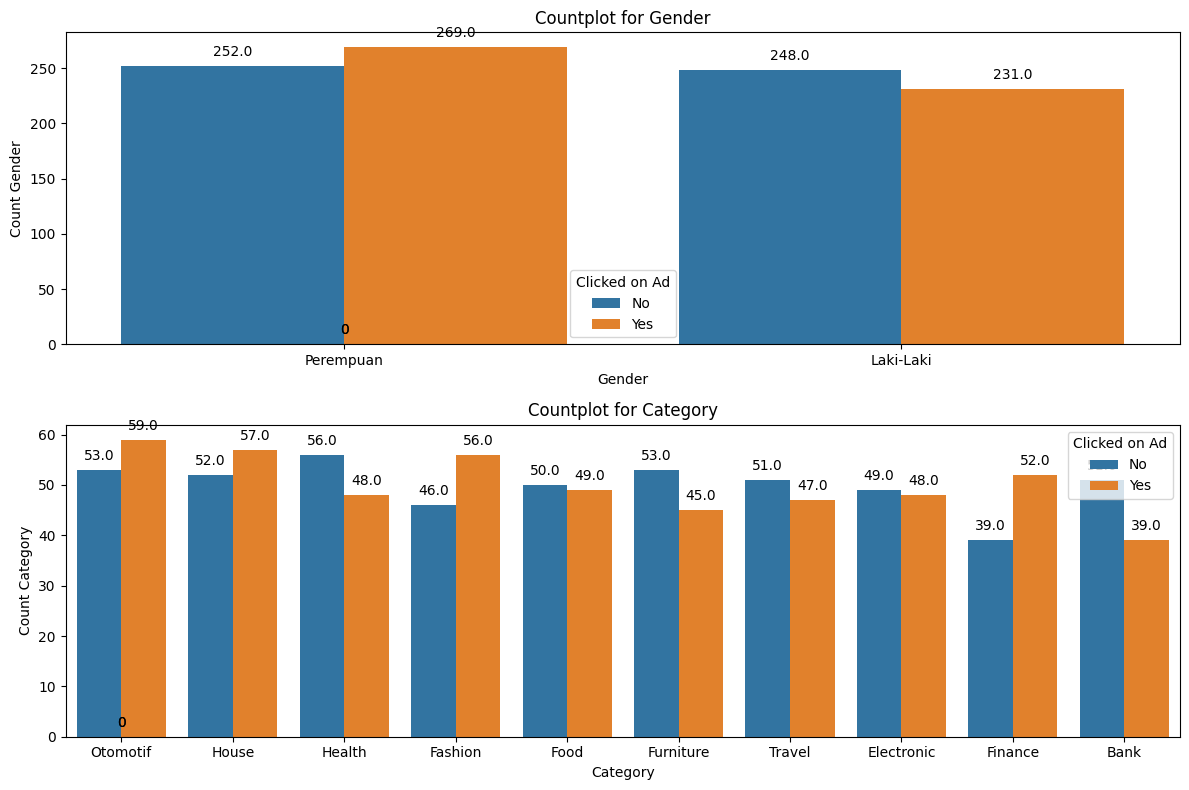

In [31]:
# Categorical Countplot with hue target (only for gender and category)
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 8))
ax = ax.flatten()

cats_cols_few = ['Gender', 'Category']

for i, col in enumerate(cats_cols_few):
    sns.countplot(data=df, x=col, ax=ax[i], order=df[col].value_counts().index, hue='Clicked on Ad')
    ax[i].set_title(f'Countplot for {col}')
    ax[i].set_ylabel(f'Count {col}')
    ax[i].tick_params(axis='x')
    
    # Adding annotations on top of each bar
    for p in ax[i].patches:
        ax[i].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()

There is not much difference between clicked and not cliked on the advertisement.

## Multivariate Analysis

As we have seen from the regression plot before that the numerical distribution is not linear, so we use method of calculating the correlation that can capture non-linear relationship better.

**Reminder About Correlation Method**

If you have a non-linear distribution of your numerical features, using Pearson correlation may not capture the full extent of the relationship between variables because Pearson correlation measures linear relationships. In such cases, Spearman and Kendall correlations can be more appropriate alternatives as they are non-parametric measures and can capture monotonic relationships, which may better reflect non-linear associations.

Here's a brief overview of each correlation method and its suitability for different types of relationships:

1. **Pearson Correlation**:
   - Measures the linear relationship between two continuous variables.
   - Assumes that variables are normally distributed and have a linear relationship.
   - Sensitive to outliers.
   - Suitable for linear relationships.

2. **Spearman Correlation**:
   - Measures the strength and direction of monotonic relationships between two continuous or ordinal variables.
   - Does not assume linearity.
   - More robust to outliers compared to Pearson correlation.
   - Suitable for non-linear relationships.

3. **Kendall Correlation**:
   - Measures the strength and direction of ordinal relationships between two variables.
   - Does not assume linearity.
   - Less affected by outliers compared to Pearson correlation.
   - Suitable for non-linear relationships, especially when the data is ranked or ordinal.

In summary, if you suspect that your data has non-linear relationships, it's advisable to calculate both Spearman and Kendall correlations in addition to Pearson correlation to capture different aspects of the relationships. This allows you to have a more comprehensive understanding of the associations between variables. Additionally, visual exploration through scatter plots or other graphical techniques can also provide insights into the nature of the relationships between variables.

Text(0.5, 1.0, 'Spearman Correlation')

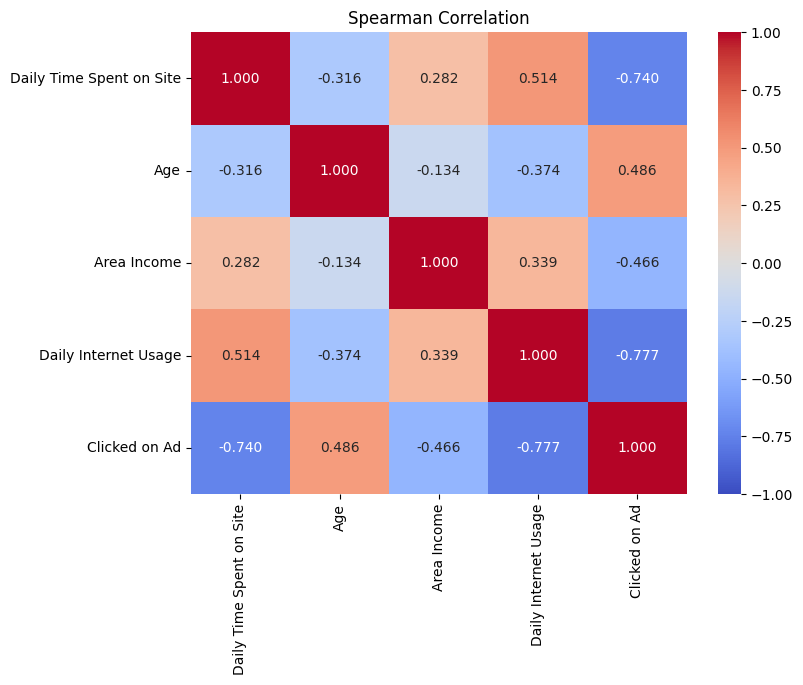

In [ ]:
# Heatmap of numerical values
df['Clicked on Ad'] = df['Clicked on Ad'].replace({'No' : 0, # Quick label encoding for target
                                                   'Yes' : 1})

fig, ax = plt.subplots()
sns.heatmap(data=df.corr(method='spearman', numeric_only=True),annot=True, cmap='coolwarm', fmt='.3f', vmin=-1, vmax=1)
plt.title('Spearman Correlation')

Text(0.5, 1.0, 'Kendall Correlation')

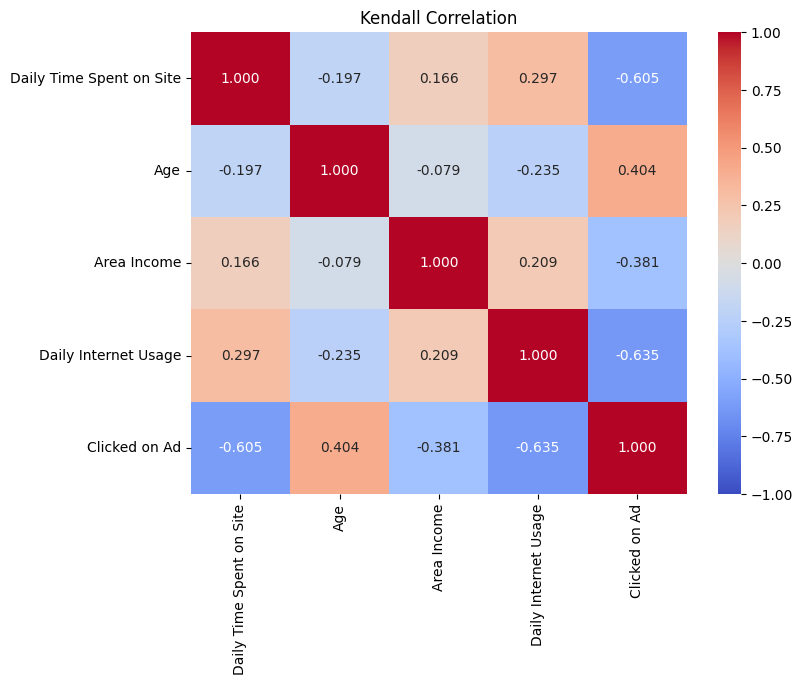

In [71]:
# Heatmap of numerical values
plt.figure(figsize=(8,6))
sns.heatmap(data=df.corr(method='kendall', numeric_only=True),annot=True, cmap='coolwarm', fmt='.3f', vmin=-1, vmax=1)
plt.title('Kendall Correlation')

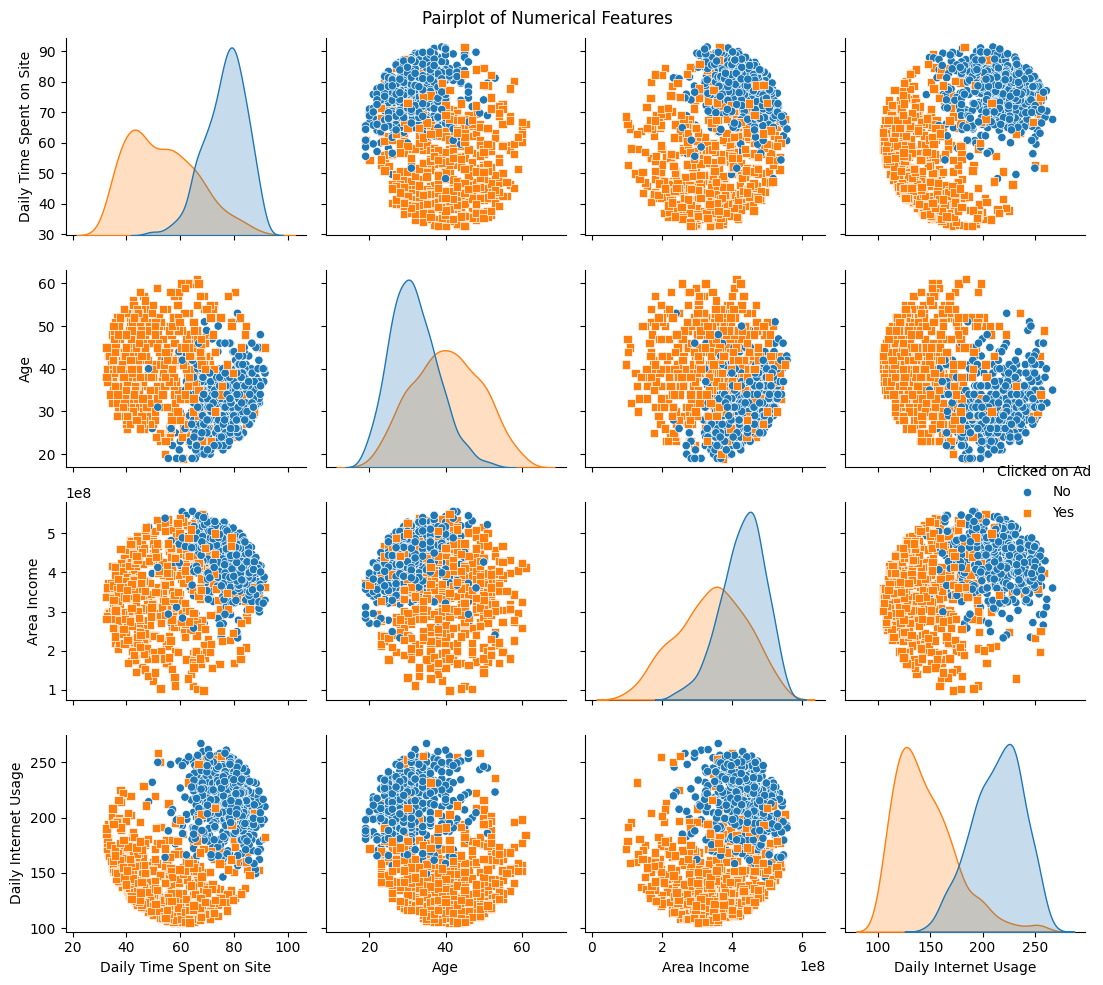

In [66]:
# Pairplot of numerical features
sns.pairplot(data=df, diag_kind='kde', hue='Clicked on Ad', markers=['o', 's'])
plt.suptitle('Pairplot of Numerical Features')
plt.tight_layout()
plt.show()

This is quite an interesting segmentation of target variable. One of them that the values distribution is not linear.

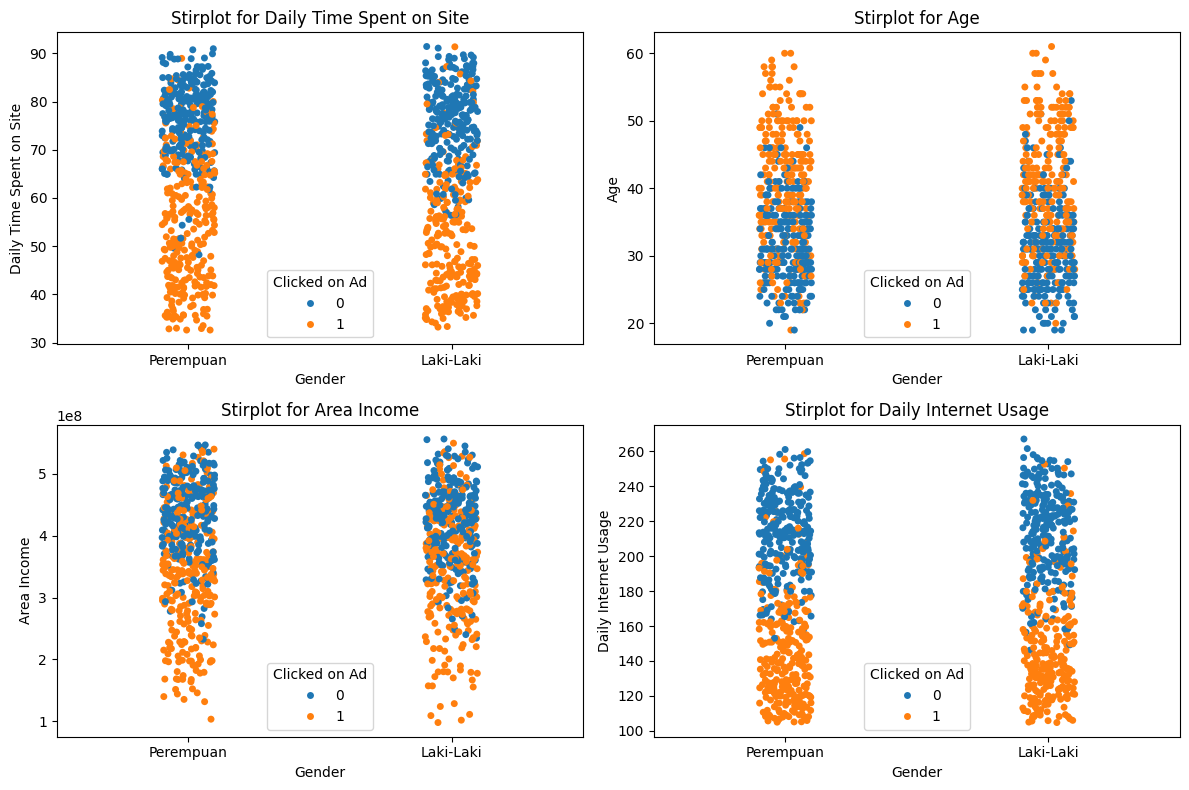

In [144]:
# Stripplot for Gender
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
ax = ax.flatten()

for i, col in enumerate(nums_cols):
    sns.stripplot(data=df, ax=ax[i], x='Gender', y=col, hue='Clicked on Ad')    
    ax[i].set_title(f'Gender Stirplot for {col}')

plt.tight_layout()
plt.show()

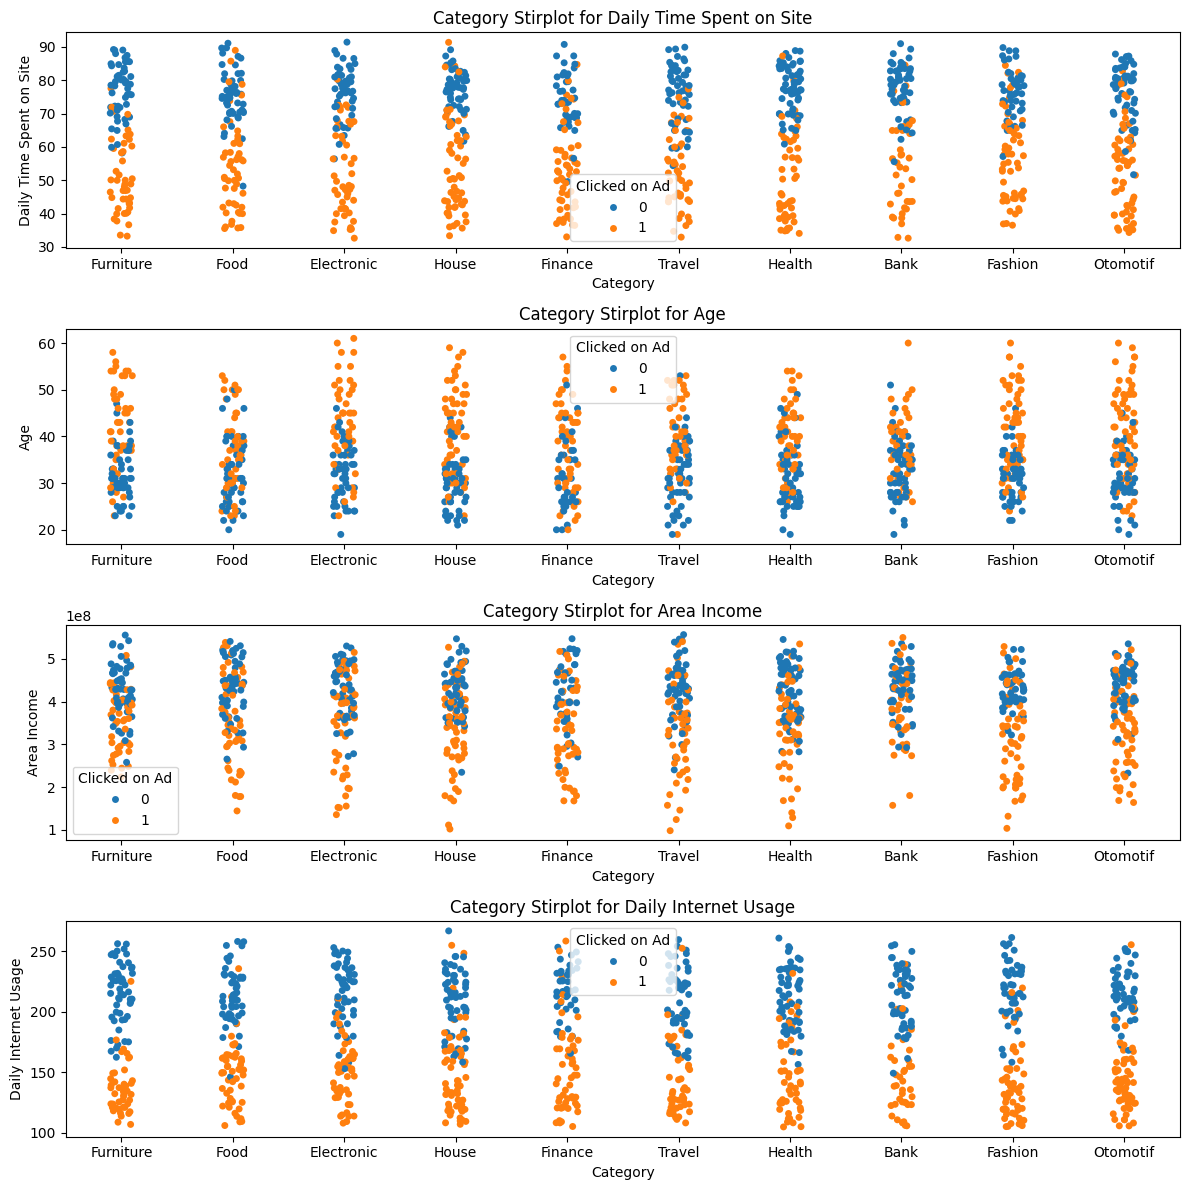

In [158]:
# Stripplot for Category
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(12, 12))
ax = ax.flatten()

for i, col in enumerate(nums_cols):
    sns.stripplot(data=df, ax=ax[i], x='Category', y=col, hue='Clicked on Ad')    
    ax[i].set_title(f'Category Stirplot for {col}')
    # ax[i].legend().remove()

plt.tight_layout()
plt.show()

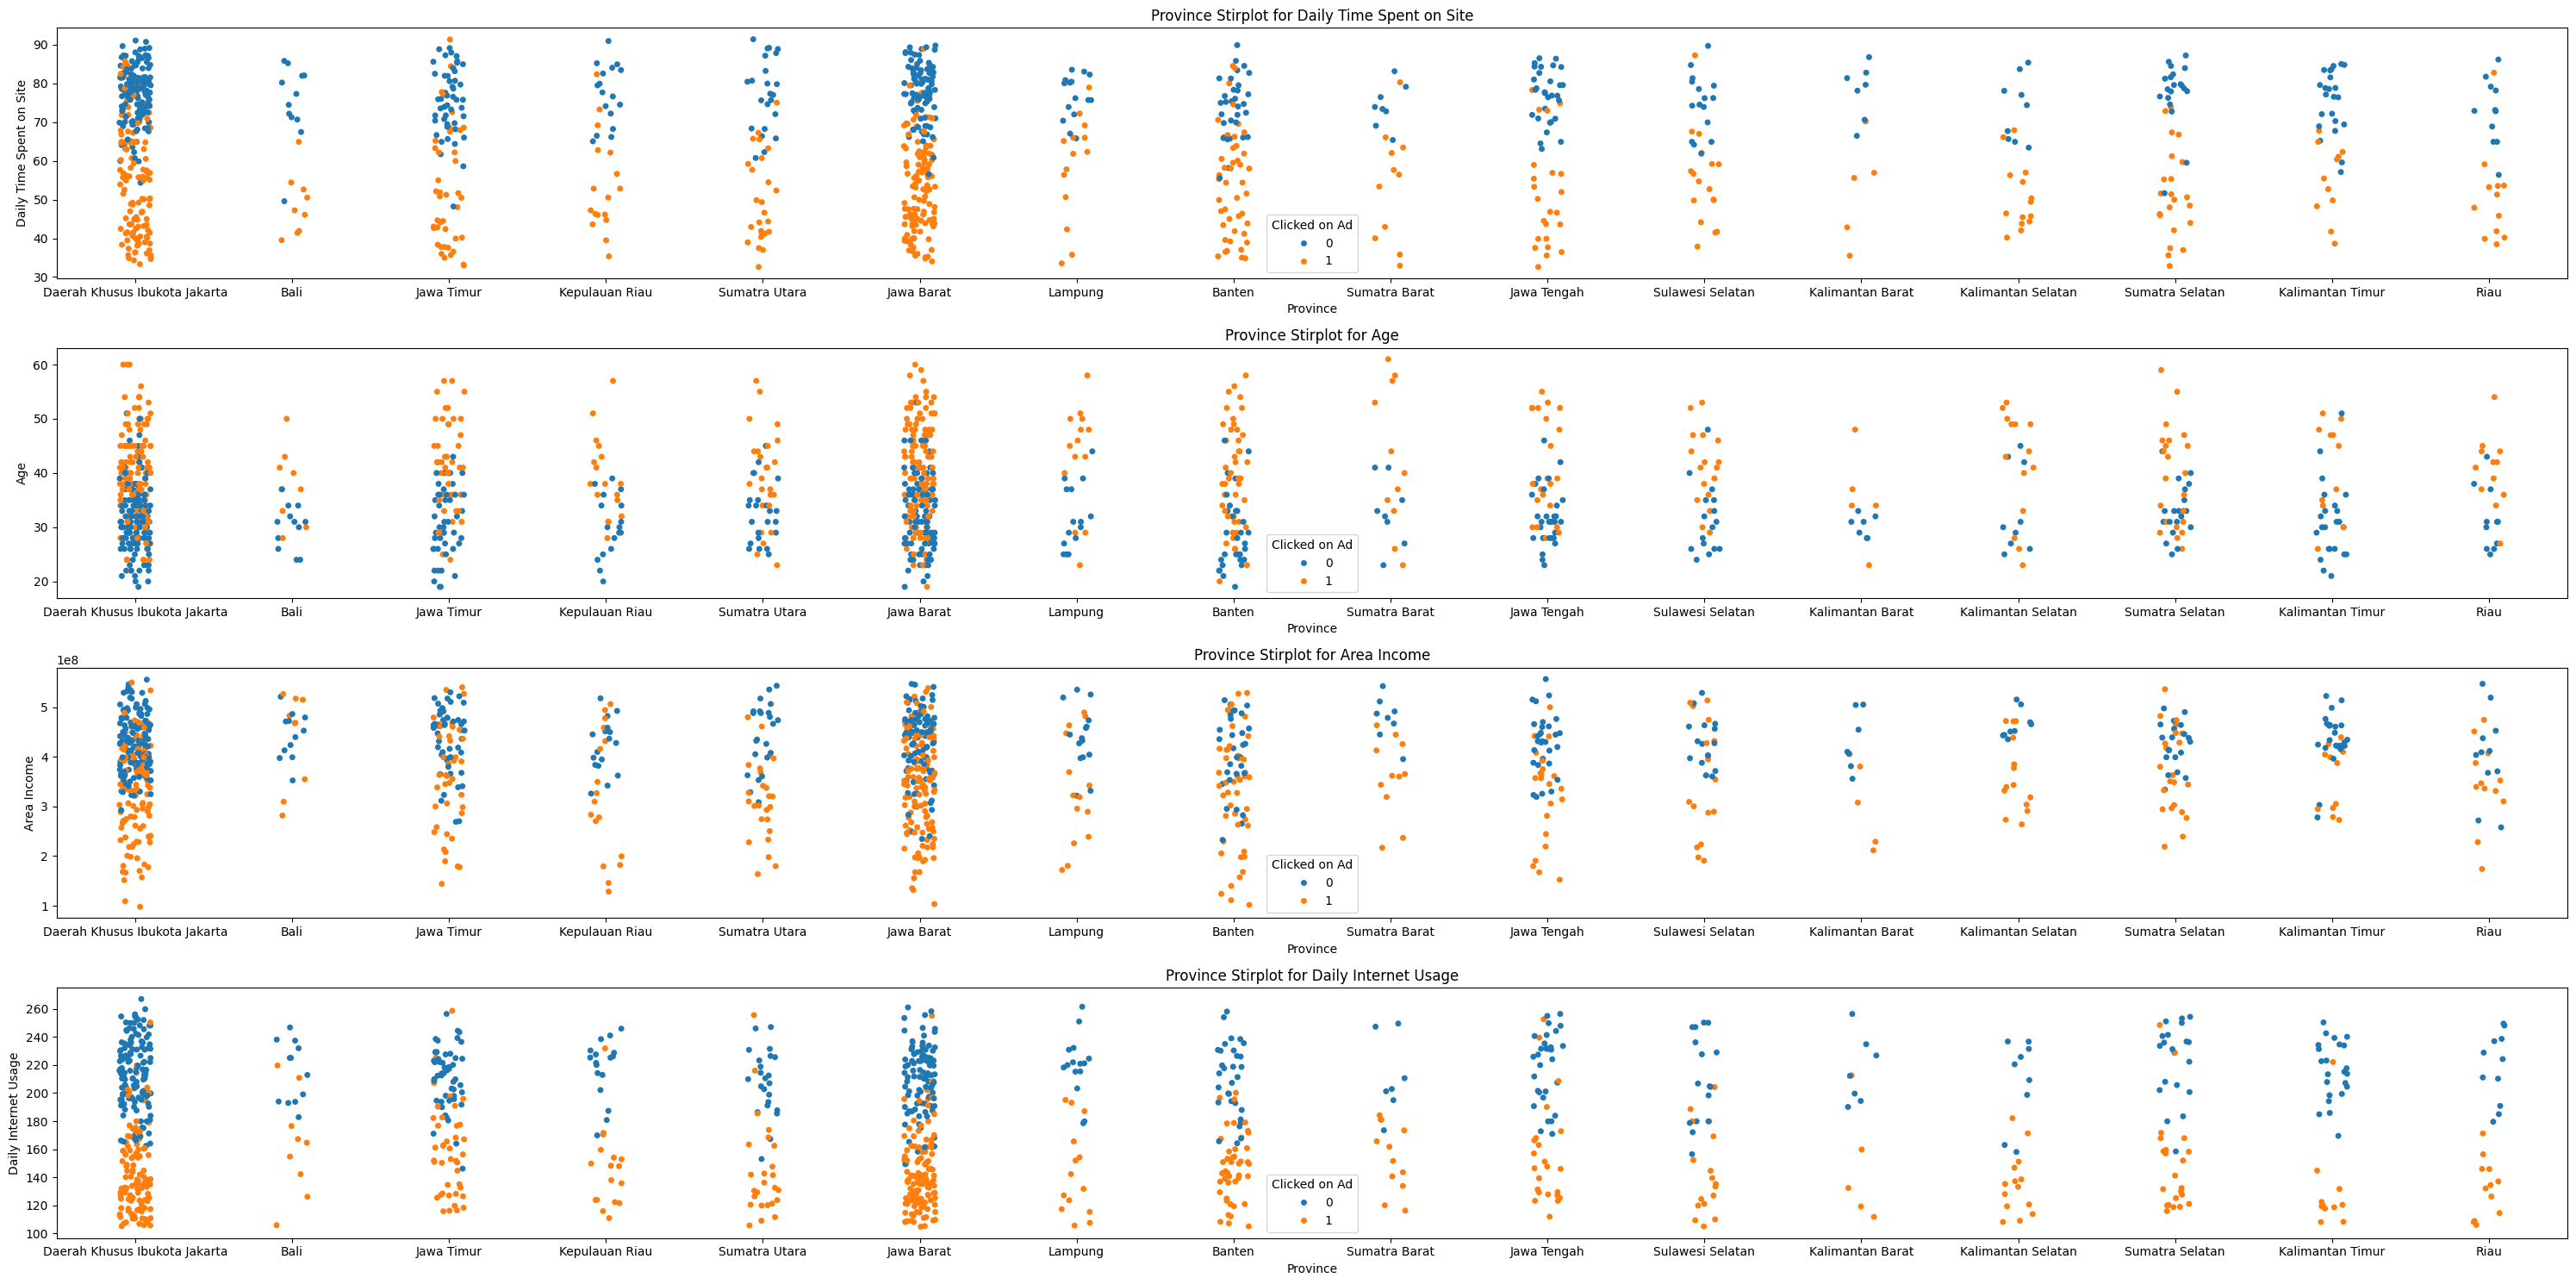

In [155]:
# Stripplot for Province
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(30, 15))
ax = ax.flatten()

for i, col in enumerate(nums_cols):
    sns.stripplot(data=df, ax=ax[i], x='Province', y=col, hue='Clicked on Ad')    
    ax[i].set_title(f'Province Stirplot for {col}')
    # ax[i].legend().remove()

plt.tight_layout()
plt.show()